* Perform basic data preprocessing in Python
* Model a classification task using the Scikit-Learn Python APIs
* Train Suppport Vector Machine and Decision Tree models using Scikit-Learn
* Run inference and assess the quality of the trained models

In [62]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC


In [63]:
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [64]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


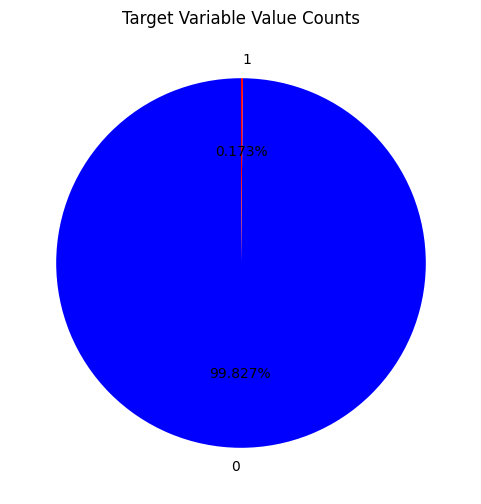

In [65]:
# get the set of distinct classes
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values
# value_count() đếm số lần xuâ hiện của mỗi giá trị trong cột class
#.vlaues trả về 1 mảng numpy chứa số lượng mẫu của từng lớp

# plot the class value counts
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(sizes, labels=labels, autopct='%1.3f%%', colors=colors, startangle=90)
ax.set_title('Target Variable Value Counts')
plt.show()

In [66]:
print(labels)

[0 1]


In [67]:
print(sizes)

[284315    492]


<Axes: >

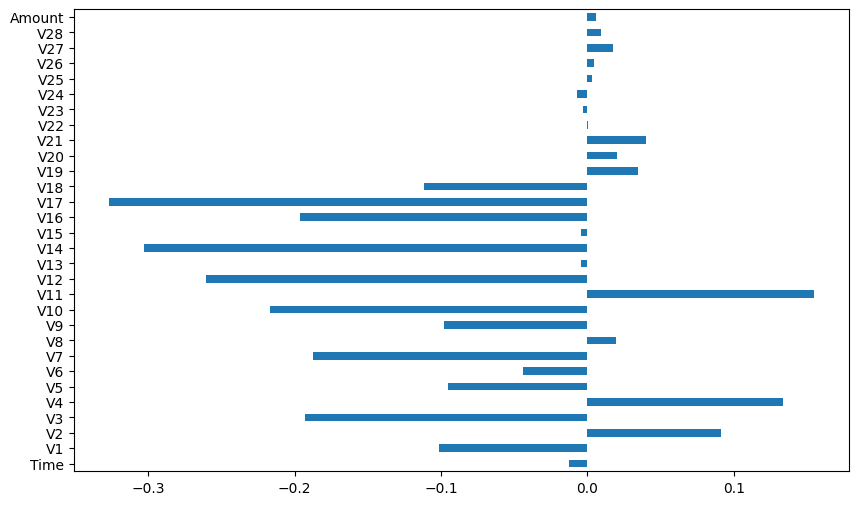

In [68]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

# Data Preprocessing

In [69]:
# standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

In [70]:
print(data_matrix)

[[ 0.00000000e+00 -6.94242321e-01 -4.40749246e-02 ... -6.37811507e-02
   2.44964263e-01  0.00000000e+00]
 [ 0.00000000e+00  6.08496328e-01  1.61175920e-01 ...  4.46075177e-02
  -3.42474541e-01  0.00000000e+00]
 [ 1.00000000e+00 -6.93500463e-01 -8.11577826e-01 ... -1.81020827e-01
   1.16068593e+00  0.00000000e+00]
 ...
 [ 1.72788000e+05  9.80023736e-01 -1.82433725e-01 ... -8.04671974e-02
  -8.18393021e-02  0.00000000e+00]
 [ 1.72788000e+05 -1.22755392e-01  3.21250341e-01 ...  3.16686777e-01
  -3.13248531e-01  0.00000000e+00]
 [ 1.72792000e+05 -2.72330934e-01 -1.14898979e-01 ...  4.13499858e-02
   5.14355311e-01  0.00000000e+00]]


In [71]:
print(X)

[[-0.05617142 -0.00356612  0.13534477 ...  0.02677257 -0.00516056
   0.01982016]
 [ 0.0617268   0.01634993  0.01113799 ... -0.00225765  0.00452505
  -0.03474114]
 [-0.02686875 -0.0314435   0.0453095  ... -0.00531318 -0.00701341
   0.04496923]
 ...
 [ 0.0576644  -0.01073436 -0.12610577 ...  0.0006494  -0.00473467
  -0.00481541]
 [-0.00560415  0.01466604  0.02115195 ...  0.01230823  0.0144577
  -0.01430073]
 [-0.02071875 -0.00874144  0.03529059 ... -0.00045525  0.00314588
   0.03913181]]


# Dataset Train/Test Split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Decision Tree Classifier model with Scikit-Learn

In [73]:
w_train = compute_sample_weight('balanced', y_train)
print(w_train)

[0.50089444 0.50089444 0.50089444 ... 0.50089444 0.50089444 0.50089444]


In [74]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
print(dt)
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)


DecisionTreeClassifier(max_depth=4, random_state=35)

# Build a Support Vector Machine model with Scikit-Learn

In [75]:
# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

 # Evaluate the Decision Tree Classifier Models

In [76]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

In [77]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


# Evaluate the Support Vector Machine Models

In [78]:
y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


# Practice Exercises

In [79]:
# your code goes here


In [80]:
correlation_values = raw_data.corr()['Class'].drop('Class')

In [81]:
data_sorting = correlation_values.sort_values(ascending=False)

In [82]:
feature_top_6 = data_sorting.sort_values(ascending=False).index[:6]

In [83]:
print(feature_top_6)

Index(['V11', 'V4', 'V2', 'V21', 'V19', 'V20'], dtype='object')


In [84]:
correlation_values = abs(raw_data.corr()['Class']).drop('Class')
correlation_values = correlation_values.sort_values(ascending=False).index[:6]
correlation_values

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3'], dtype='object')

In [85]:
print(correlation_values)

Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3'], dtype='object')


In [86]:
# Chỉ lấy các cột thuộc top 6 đặc trưng quan trọng nhất
X = raw_data[correlation_values].values
y = data_matrix[:, 30]

In [91]:
# Chia tập dữ liệu thành huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train)

# Dự đoán và tính ROC-AUC
y_pred_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f"Decision Tree ROC-AUC score: {roc_auc_dt:.3f}")

Decision Tree ROC-AUC score: 0.930


In [88]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [92]:
# Huấn luyện mô hình SVM
svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False, max_iter=5000)
svm.fit(X_train, y_train)

# Dự đoán điểm số quyết định của SVM
y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print(f"SVM ROC-AUC score: {roc_auc_svm:.3f}")

SVM ROC-AUC score: 0.971


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [89]:
y_pred_dt = dt.predict_proba(X_test)[:,1]
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939
